In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [6]:
from sklearn.datasets import load_diabetes

In [7]:
temp = load_diabetes()
diabetes_df = pd.DataFrame( temp['data'], columns=temp['feature_names'] )
diabetes_df['target'] = temp['target']

In [8]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [9]:
# # pairplot 생성
# # sns.set(style="ticks")
# pairplot = sns.pairplot(diabets_df, hue = 'target')

# # 제목 추가
# plt.suptitle('Pairwise Relationships Between Variables', y=1.02, fontsize=16)

# # 조금 더 여백 추가
# plt.tight_layout()
# plt.show()

In [10]:
# LInear_Regression
# Target 데이터와 feature간에 선형 관계가 있다고 가정
# # y = a1x1 + a2x2 + a3x3 + ... + b
# 가정 1 : x 와 y가 선형관계다
# 가정 2 : 예측값의 오차가 y에 독립적이다
# .. => 통계쩍 가정들 ML에서는 신경쓰지 않음
# 그래도 지켜져야 하는 것 ! feature들이 서로 독립적이어야(다중성 문제 발생) 

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [17]:
X = diabetes_df.iloc[ : , :-1]
y = diabetes_df['target']

train_x, valid_x, train_y, valid_y = train_test_split(X,y,
                                                        test_size = 0.3,
                                                        random_state = 42)

In [18]:
lr = LinearRegression()
lr.fit(train_x, train_y)
lr.coef_ # 각 feature들의 회귀계수가 계산됨 , 회귀계수 : 특징(feature)**이 타겟 값에 얼마나 영향을 주는지를 수치로 나타낸 값

array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
       -901.95966819,  506.76324136,  121.15435079,  288.03526689,
        659.26895081,   41.37670105])

In [19]:
from sklearn.metrics import mean_squared_error

# RMSE
mean_squared_error(valid_y,  lr.predict(valid_x) ) ** 0.5

53.120156070942706

In [24]:
# feature가 서로 연관?! => corr

# 상관관계 correlation 구하기
diabetes_df.corr() # 1이면 비례, 0이면 관계 없음, -1이면반비례

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


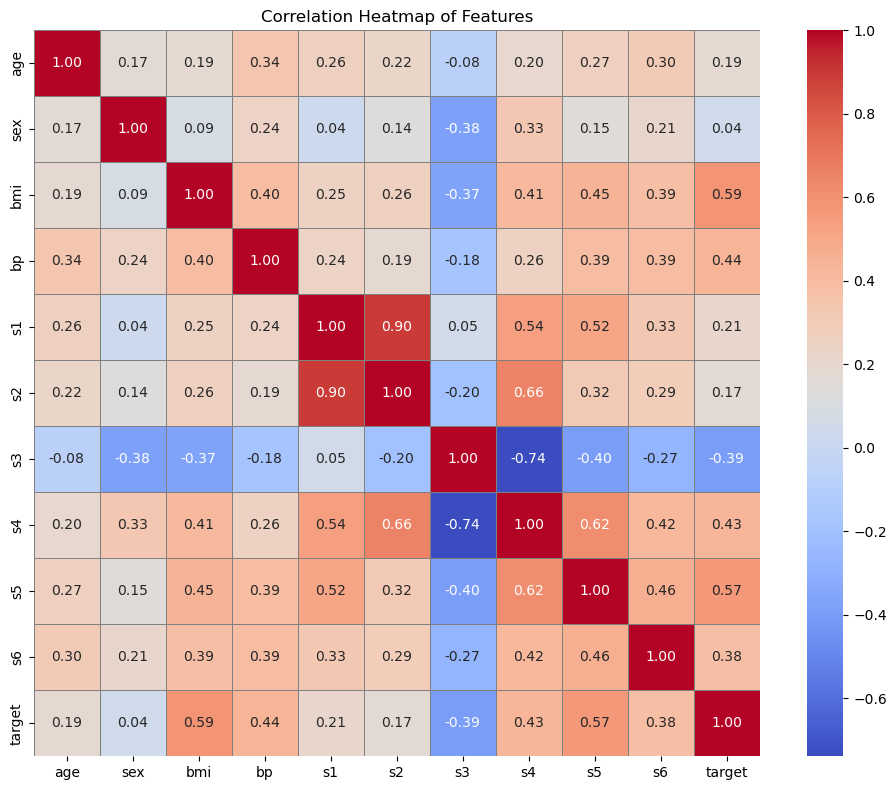

In [25]:
# 1. 상관계수 계산
corr_matrix = diabetes_df.corr()

# 2. 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,         # 셀에 수치 표시
            fmt=".2f",           # 소수점 2자리
            cmap='coolwarm',     # 색상 테마
            square=True,         # 정사각형 셀
            linewidths=0.5, 
            linecolor='gray')

plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

In [26]:
# VIF (Variance Inflation Factor) 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
for ix, col in enumerate(X.columns):
    print(col, variance_inflation_factor(X,ix)) # VIF ≥ 10: 심각한 다중공선성 문제가 있음

age 1.2173065138070072
sex 1.2780710154103625
bmi 1.5094373738445481
bp 1.4594277776838305
s1 59.202510134318615
s2 39.1933699727707
s3 15.402156007513453
s4 8.890986360329626
s5 10.075967132038336
s6 1.4846226073834825


In [28]:
X2 = X.drop('s1', axis=1) 

In [30]:
for ix, col in enumerate(X2.columns):
    print(col, variance_inflation_factor(X2,ix)) # VIF ≥ 10: 심각한 다중공선성 문제가 있음

age 1.2168924990717664
sex 1.2750486364396652
bmi 1.5023204346436043
bp 1.4574130684546214
s2 2.9265353553181814
s3 3.7368898006586306
s4 7.818670164713717
s5 2.1728652440836482
s6 1.4844102674479702


In [32]:
train_x, valid_x, train_y, valid_y = train_test_split(X2,y, 
                                                      test_size= 0.3, 
                                                      random_state= 42 )

lr2 = LinearRegression()
lr2.fit(train_x, train_y)

LinearRegression()

In [33]:
lr2.coef_# 각 feature들의 회귀계수가 계산됨 , 회귀계수 : 특징(feature)**이 타겟 값에 얼마나 영향을 주는지를 수치로 나타낸 값

array([  35.1189475 , -255.10431136,  565.91530912,  378.5220706 ,
       -188.35433511, -276.56884547,  155.53902224,  315.41287376,
         49.36224621])

In [36]:
lr2.score(valid_x, valid_y) # 0.46이면 46퍼 맞춘건가? , ㄴㄴ 결정 계수(R²)를 반환

# 1에 가까울수록: 모델이 데이터의 변동성을 잘 설명하고 있음 (좋은 모델)
# 0에 가까울수록: 모델이 데이터의 변동성을 거의 설명하지 못함 (나쁜 모델)
# 음수값: 단순히 평균값으로 예측하는 것보다도 나쁜 성능 (매우 나쁜 모델)

0.47624178709700093

In [37]:
lr2.score(valid_x, valid_y)

0.47624178709700093

In [38]:
mean_squared_error( valid_y , lr2.predict(valid_x)) ** 0.5 # valid_y는 진짜 y, lr2.predict(valid_x)는 예측한 y

53.17337704214165

# KNN

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
params = {'n_neighbors' : [5, 10, 15, 20, 25, 30]}
grid_knn = GridSearchCV(KNeighborsRegressor(), params , cv = 5,
                       scoring = 'neg_root_mean_squared_error')  
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30]},
             scoring='neg_root_mean_squared_error')

scikit-learn의 점수 원칙: scikit-learn에서 모든 점수(score)는 **"높을수록 좋은 모델"**이라는 일관된 원칙을 따릅니다.

오차 지표의 특성: RMSE(Root Mean Squared Error)와 같은 오차 지표는 값이 **"낮을수록 좋은 모델"**을 의미합니다.

모순 해결 방법: 이 모순을 해결하기 위해, scikit-learn은 오차 지표에 음수(negative)를 취하고 'neg_'를 접두사로 붙입니다.

In [41]:
grid_knn.cv_results_['mean_test_score']    # R^2값을 나타냄

cv_result = pd.DataFrame( grid_knn.cv_results_['params'])
cv_result['score'] = grid_knn.cv_results_['mean_test_score']
# cv_result
pd.pivot_table( cv_result, columns='n_neighbors')

n_neighbors,5,10,15,20,25,30
score,-62.857852,-58.783464,-58.646872,-59.371783,-59.896551,-60.307
